<a href="https://colab.research.google.com/github/OM-TRIPATHI1513/Brain_Tumor_Detection_Datasets/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.6915 - loss: 0.5745 - val_accuracy: 0.8596 - val_loss: 0.3939
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8093 - loss: 0.4220 - val_accuracy: 0.8702 - val_loss: 0.2991
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.8451 - loss: 0.3374 - val_accuracy: 0.9064 - val_loss: 0.2494
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.8963 - loss: 0.2629 - val_accuracy: 0.9255 - val_loss: 0.1985
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9230 - loss: 0.2054 - val_accuracy: 0.9404 - val_loss: 0.1602
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9552 - loss: 0.1335 - val_accuracy: 0.9617 - val_loss: 0.1189
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9733 - loss: 0.0910 - val_accuracy: 0.9681 - val_loss: 0.0992
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9861 - loss: 0.0536 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,872 (2.02 MB)

 Trainable params: 176,290 (688.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 352,582 (1.34 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
The probability of tumor presence is: 0.29%
Tumor presence: No

Test accuracy: 0.9745
Test loss: 0.0745
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


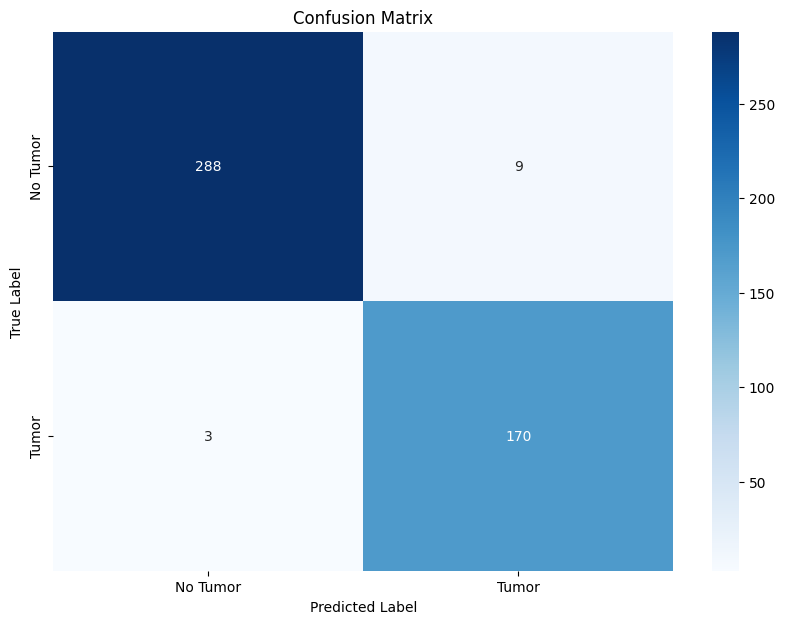


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.99      0.97      0.98       297
       Tumor       0.95      0.98      0.97       173

    accuracy                           0.97       470
   macro avg       0.97      0.98      0.97       470
weighted avg       0.97      0.97      0.97       470



In [6]:
def train_model():
    image_directory = 'datasets/'
    no_tumor_images = os.listdir(image_directory + 'no/')
    yes_tumor_images = os.listdir(image_directory + 'yes/')
    dataset = []
    label = []

    INPUT_SIZE = 64

    for image_name in no_tumor_images:
        if image_name.split('.')[1] == 'jpg':
            image = cv2.imread(image_directory + 'no/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(0)

    for image_name in yes_tumor_images:
        if image_name.split('.')[1] == 'jpg':
            image = cv2.imread(image_directory + 'yes/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(1)

    dataset = np.array(dataset)
    label = np.array(label)

    x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

    x_train = normalize(x_train, axis=1)
    x_test = normalize(x_test, axis=1)

    y_train = to_categorical(y_train, num_classes=2)
    y_test = to_categorical(y_test, num_classes=2)

    model = Sequential()

    model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=10,
                        validation_data=(x_test, y_test),
                        shuffle=False)

    # Save the model
    model.save('my_model.keras')

    # Save training data
    with open('x_train.pkl', 'wb') as f:
        pickle.dump(x_train, f)
    with open('y_train.pkl', 'wb') as f:
        pickle.dump(y_train, f)
    with open('x_test.pkl', 'wb') as f:
        pickle.dump(x_test, f)
    with open('y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)

    return model, history, x_train, y_train, x_test, y_test

def test_model(model, x_train, y_train, x_test, y_test):
    # Read and preprocess the image
    image_path = 'pred//pred2.jpg'
    image = cv2.imread(image_path)
    img = Image.fromarray(image)
    img = img.resize((64, 64))
    img = np.array(img)

    # Preprocess the image - assuming normalization to [0, 1] during training
    input_img = img.astype('float32') / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    # Make predictions
    predictions = model.predict(input_img)
    tumor_probability = predictions[0][1] * 100  # Probability of tumor presence

    # Determine the binary classification based on a threshold
    threshold = 50  # Adjust the threshold as needed
    binary_result = "Yes" if tumor_probability >= threshold else "No"

    # Print the percentage of efficiency and binary classification
    print(f"The probability of tumor presence is: {tumor_probability:.2f}%")
    print(f"Tumor presence: {binary_result}")

    # Evaluate model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Train the model and get the results
    model, history, x_train, y_train, x_test, y_test = train_model()

    # Create accuracy table
    accuracy_table = pd.DataFrame({
        'Epoch': range(1, len(history.history['accuracy']) + 1),
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']
    })

    print("\nAccuracy Table:")
    print(accuracy_table.to_string(index=False))

    # Print final training accuracy
    final_train_accuracy = history.history['accuracy'][-1]
    print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Print model summary
    model.summary()

    # Test the model on a specific image
    test_model(model, x_train, y_train, x_test, y_test)

    # Generate predictions for confusion matrix
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred_classes, classes=['No Tumor', 'Tumor'])

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor']))


